# Red Wine Quality Report

# Importing Dataset

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Wineproject.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Checking Null values in the dataframe.

In [3]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

Since there are no null values then we can proceed.

# Dataframe Description:

The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine.
Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) 
variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced
(e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure
if all input variables are relevant. So it could be interesting to test feature selection methods.

Use machine learning we needto determine which physiochemical properties make a wine 'good'!
So the terget column is Quality

# Checking the datatypes of the columns.

In [5]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

we have observed that all the column has float value

# Making DataFrame for the Nominal Data

In [6]:
df_visualization_nominal=df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']].copy()

In [7]:
df_visualization_nominal.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

# Visualization of the Data:

In [8]:
import seaborn as sns

<AxesSubplot:xlabel='quality', ylabel='count'>

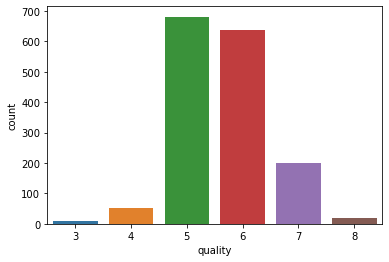

In [9]:
sns.countplot(x="quality", data=df_visualization_nominal)

<AxesSubplot:xlabel='fixed acidity', ylabel='count'>

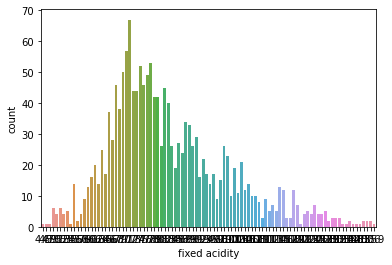

In [10]:
sns.countplot(x="fixed acidity", data=df_visualization_nominal)

<AxesSubplot:xlabel='volatile acidity', ylabel='count'>

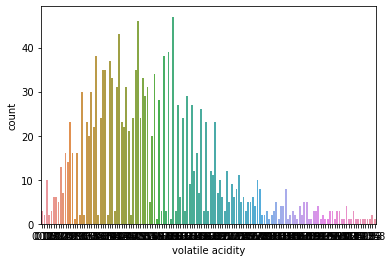

In [11]:
sns.countplot(x="volatile acidity", data=df_visualization_nominal)

<AxesSubplot:xlabel='alcohol', ylabel='count'>

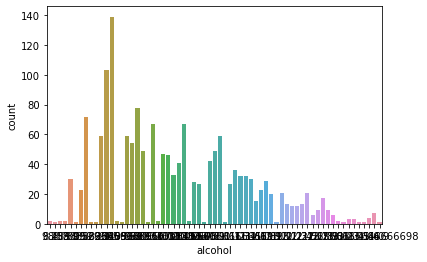

In [12]:
sns.countplot(x="alcohol", data=df_visualization_nominal)

<AxesSubplot:xlabel='pH', ylabel='count'>

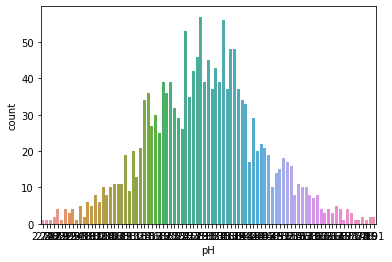

In [13]:
sns.countplot(x="pH", data=df_visualization_nominal)

# Dist Plot for target columns

In [14]:
df_visualization_continuous=df[["alcohol","quality"]].copy()

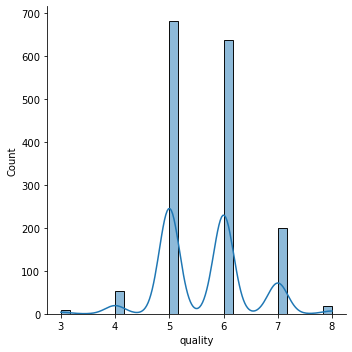

In [15]:
import seaborn as sns
sns.displot(df_visualization_continuous['quality'], kde=True)

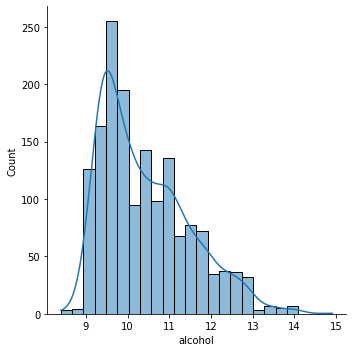

In [16]:
sns.displot(df_visualization_continuous['alcohol'], kde=True)

# Correlation of the columns with the target columns:

In [17]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


# Plotting heatmap

<AxesSubplot:>

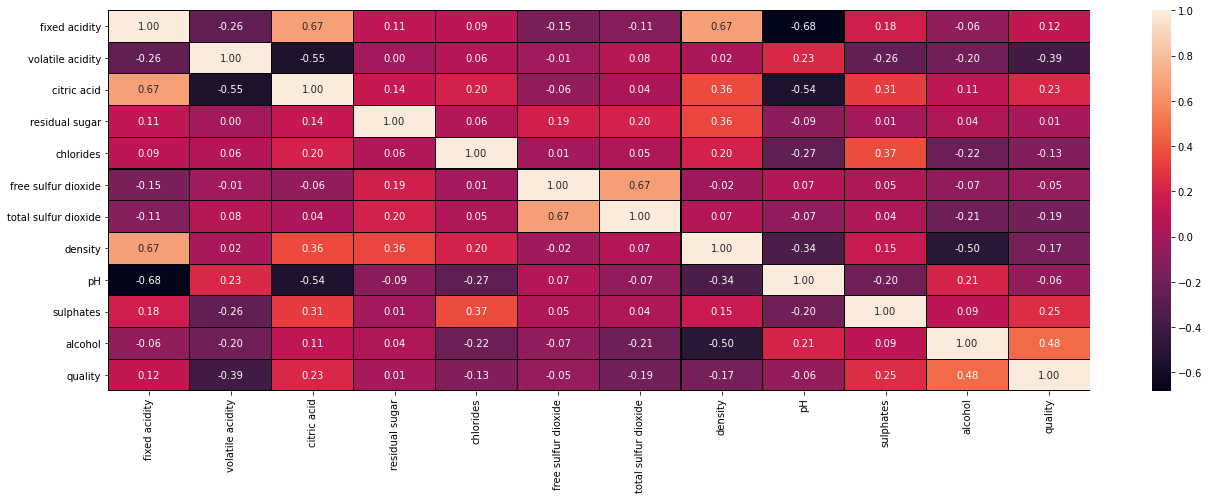

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="black",fmt="0.2f")

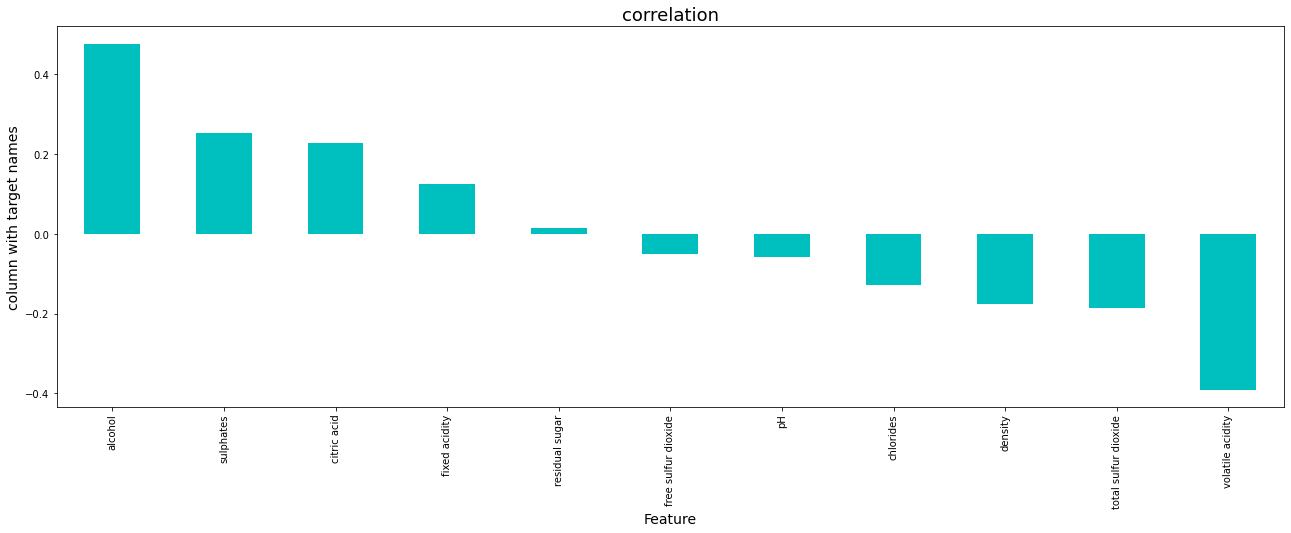

In [19]:
plt.figure(figsize=(22,7))
df.corr()['quality'].sort_values(ascending=False).drop(['quality']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [20]:
df.shape

(1599, 12)

# skewness Treatment

In [21]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [22]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  13,   14,   15,   15,   17,   17,   19,   33,   38,   42,   43,
          45,   57,   81,   81,   83,   86,   88,   91,   92,   95,  106,
         106,  109,  120,  126,  127,  142,  144,  147,  151,  151,  151,
         151,  163,  164,  169,  169,  181,  199,  226,  226,  240,  243,
         244,  258,  258,  274,  281,  291,  324,  325,  339,  340,  347,
         354,  374,  381,  391,  396,  396,  400,  400,  442,  442,  451,
         459,  467,  480,  480,  494,  515,  517,  544,  554,  554,  555,
         555,  557,  557,  568,  584,  588,  591,  595,  608,  614,  636,
         639,  649,  649,  651,  652,  652,  652,  672,  672,  684,  690,
         690,  692,  692,  695,  723,  724,  730,  754,  776,  777,  795,
         821,  832,  836,  837,  889,  899,  911,  917,  923,  925,  926,
         982, 1017, 1018, 1043, 1051, 1051, 1071, 1074, 1079, 1079, 1081,
        1081, 1111, 1114, 1131, 1154, 1165, 1175, 1186, 1231, 1235, 1244,
        1244, 1244, 1260, 1269, 1269, 

In [23]:
df_new_z=df[(z<3).all(axis=1)]
df_new_z

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [24]:
df_new_z.shape

(1451, 12)

In [25]:
Data_loss=((1451-1322)/1451)*100

In [26]:
Data_loss

8.890420399724327

its less than 10 so we can processed

In [61]:
df=df_new_z

# Separating the columns into features and target:

In [62]:
features=df.drop("quality",axis=1)
target=df["quality"]

In [63]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# Processing Classification technique

In [64]:
x=features
y=target
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size= 0.20,random_state= 42)

In [65]:
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [66]:
mnb=MultinomialNB()
mnb.fit(x_train,y_train)
predmnb=mnb.predict(x_test)
print(accuracy_score(y_test,predmnb))
print(confusion_matrix(y_test,predmnb))
print(classification_report(y_test,predmnb))

0.422680412371134
[[ 0  2  2  7  0]
 [ 0 49 47 24  0]
 [ 0 32 52 32  0]
 [ 0  5 13 22  0]
 [ 0  1  0  3  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.55      0.41      0.47       120
           6       0.46      0.45      0.45       116
           7       0.25      0.55      0.34        40
           8       0.00      0.00      0.00         4

    accuracy                           0.42       291
   macro avg       0.25      0.28      0.25       291
weighted avg       0.44      0.42      0.42       291



In [67]:
svc=SVC(kernel='rbf')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.46048109965635736
[[ 0  2  9  0  0]
 [ 0 41 79  0  0]
 [ 0 23 93  0  0]
 [ 0  4 36  0  0]
 [ 0  1  3  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.58      0.34      0.43       120
           6       0.42      0.80      0.55       116
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         4

    accuracy                           0.46       291
   macro avg       0.20      0.23      0.20       291
weighted avg       0.41      0.46      0.40       291



In [68]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
dtc.score(x_train,y_train)
preddtc=dtc.predict(x_test)
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.5395189003436426
[[ 0  5  5  1  0]
 [ 6 67 41  5  1]
 [ 2 29 65 17  3]
 [ 0  4 11 25  0]
 [ 0  0  1  3  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.64      0.56      0.60       120
           6       0.53      0.56      0.54       116
           7       0.49      0.62      0.55        40
           8       0.00      0.00      0.00         4

    accuracy                           0.54       291
   macro avg       0.33      0.35      0.34       291
weighted avg       0.54      0.54      0.54       291



In [69]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.4570446735395189
[[ 0  6  5  0  0]
 [ 0 81 39  0  0]
 [ 1 63 44  8  0]
 [ 2 12 18  8  0]
 [ 0  2  0  2  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.49      0.68      0.57       120
           6       0.42      0.38      0.40       116
           7       0.44      0.20      0.28        40
           8       0.00      0.00      0.00         4

    accuracy                           0.46       291
   macro avg       0.27      0.25      0.25       291
weighted avg       0.43      0.46      0.43       291



In [70]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn.score(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.4570446735395189
[[ 0  6  5  0  0]
 [ 0 81 39  0  0]
 [ 1 63 44  8  0]
 [ 2 12 18  8  0]
 [ 0  2  0  2  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.49      0.68      0.57       120
           6       0.42      0.38      0.40       116
           7       0.44      0.20      0.28        40
           8       0.00      0.00      0.00         4

    accuracy                           0.46       291
   macro avg       0.27      0.25      0.25       291
weighted avg       0.43      0.46      0.43       291



In [71]:
svc=SVC(kernel='poly')
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.4570446735395189
[[  0   1  10   0   0]
 [  0  27  93   0   0]
 [  0  10 106   0   0]
 [  0   3  37   0   0]
 [  0   1   3   0   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.64      0.23      0.33       120
           6       0.43      0.91      0.58       116
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         4

    accuracy                           0.46       291
   macro avg       0.21      0.23      0.18       291
weighted avg       0.43      0.46      0.37       291



In [72]:
def svmkernel(ker):
    svc=SVC(kernel=ker)
    svc.fit(x_train,y_train)
    svc.score(x_train,y_train)
    predsvc=svc.predict(x_test)
    print(accuracy_score(y_test,predsvc))
    print(confusion_matrix(y_test,predsvc))
    print(classification_report(y_test,predsvc))

In [73]:
svmkernel('rbf')

0.46048109965635736
[[ 0  2  9  0  0]
 [ 0 41 79  0  0]
 [ 0 23 93  0  0]
 [ 0  4 36  0  0]
 [ 0  1  3  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.58      0.34      0.43       120
           6       0.42      0.80      0.55       116
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         4

    accuracy                           0.46       291
   macro avg       0.20      0.23      0.20       291
weighted avg       0.41      0.46      0.40       291



In [74]:
svmkernel('poly')

0.4570446735395189
[[  0   1  10   0   0]
 [  0  27  93   0   0]
 [  0  10 106   0   0]
 [  0   3  37   0   0]
 [  0   1   3   0   0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.64      0.23      0.33       120
           6       0.43      0.91      0.58       116
           7       0.00      0.00      0.00        40
           8       0.00      0.00      0.00         4

    accuracy                           0.46       291
   macro avg       0.21      0.23      0.18       291
weighted avg       0.43      0.46      0.37       291



# Processing Ensamble programm

In [75]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print(accuracy_score(y_test,predrf))
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

0.6838487972508591
[[ 0  7  4  0  0]
 [ 0 85 34  1  0]
 [ 0 27 87  2  0]
 [ 0  4  9 27  0]
 [ 0  0  1  3  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.69      0.71      0.70       120
           6       0.64      0.75      0.69       116
           7       0.82      0.68      0.74        40
           8       0.00      0.00      0.00         4

    accuracy                           0.68       291
   macro avg       0.43      0.43      0.43       291
weighted avg       0.65      0.68      0.67       291



In [76]:
from sklearn.ensemble import AdaBoostClassifier
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.38831615120274915
[[ 3  2  0  6  0]
 [45 40 23 12  0]
 [20 23 52 20  1]
 [ 5  6 11 18  0]
 [ 1  0  1  2  0]]
              precision    recall  f1-score   support

           4       0.04      0.27      0.07        11
           5       0.56      0.33      0.42       120
           6       0.60      0.45      0.51       116
           7       0.31      0.45      0.37        40
           8       0.00      0.00      0.00         4

    accuracy                           0.39       291
   macro avg       0.30      0.30      0.27       291
weighted avg       0.51      0.39      0.43       291



In [77]:
ad = AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.38831615120274915
[[ 3  2  0  6  0]
 [45 40 23 12  0]
 [20 23 52 20  1]
 [ 5  6 11 18  0]
 [ 1  0  1  2  0]]
              precision    recall  f1-score   support

           4       0.04      0.27      0.07        11
           5       0.56      0.33      0.42       120
           6       0.60      0.45      0.51       116
           7       0.31      0.45      0.37        40
           8       0.00      0.00      0.00         4

    accuracy                           0.39       291
   macro avg       0.30      0.30      0.27       291
weighted avg       0.51      0.39      0.43       291



In [78]:
ad = AdaBoostClassifier(n_estimators=50)
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.38831615120274915
[[ 3  2  0  6  0]
 [45 40 23 12  0]
 [20 23 52 20  1]
 [ 5  6 11 18  0]
 [ 1  0  1  2  0]]
              precision    recall  f1-score   support

           4       0.04      0.27      0.07        11
           5       0.56      0.33      0.42       120
           6       0.60      0.45      0.51       116
           7       0.31      0.45      0.37        40
           8       0.00      0.00      0.00         4

    accuracy                           0.39       291
   macro avg       0.30      0.30      0.27       291
weighted avg       0.51      0.39      0.43       291



In [79]:
from sklearn.svm import SVC
svc=SVC(kernel='linear')
ad=AdaBoostClassifier(n_estimators=50, base_estimator=svc,algorithm='SAMME')
ad.fit(x_train,y_train)
ad_pred=ad.predict(x_test)
print(accuracy_score(y_test,ad_pred))
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

0.5257731958762887
[[ 0  6  4  1  0]
 [ 0 56 62  2  0]
 [ 0 22 82 12  0]
 [ 0  5 20 15  0]
 [ 0  0  2  2  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.63      0.47      0.54       120
           6       0.48      0.71      0.57       116
           7       0.47      0.38      0.42        40
           8       0.00      0.00      0.00         4

    accuracy                           0.53       291
   macro avg       0.32      0.31      0.31       291
weighted avg       0.52      0.53      0.51       291



# Processing Boosting Technique

In [80]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred=gb.predict(x_test)
print(accuracy_score(y_test,gb_pred))
print(confusion_matrix(y_test,gb_pred))
print(classification_report(y_test,gb_pred))

0.6563573883161512
[[ 0  7  3  1  0]
 [ 1 91 27  1  0]
 [ 2 32 75  6  1]
 [ 0  5 10 25  0]
 [ 0  0  1  3  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.67      0.76      0.71       120
           6       0.65      0.65      0.65       116
           7       0.69      0.62      0.66        40
           8       0.00      0.00      0.00         4

    accuracy                           0.66       291
   macro avg       0.40      0.41      0.40       291
weighted avg       0.63      0.66      0.64       291



In [81]:
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier

In [82]:
estimator = []
estimator.append(('LR',KNeighborsClassifier()))
estimator.append(('SVC',SVC(gamma='auto', probability = True)))
estimator.append(('DTC',DecisionTreeClassifier()))
estimator

[('LR', KNeighborsClassifier()),
 ('SVC', SVC(gamma='auto', probability=True)),
 ('DTC', DecisionTreeClassifier())]

In [83]:
vot_hard = VotingClassifier(estimators= estimator, voting = 'hard')
vot_hard.fit(x_train,y_train)
y_pred = vot_hard.predict(x_test)
print(y_pred)
score = accuracy_score(y_test,y_pred)
print("Hard Voting Score % d" % score)

[7 6 5 6 5 5 5 5 6 5 7 6 5 6 6 7 6 5 6 5 5 5 6 5 6 6 6 5 5 5 7 4 6 5 6 6 5
 6 6 5 7 7 6 5 6 6 5 6 6 5 5 5 5 5 5 5 5 7 5 6 5 5 6 5 6 6 6 6 5 7 6 6 5 5
 6 6 5 5 6 5 5 5 6 5 5 5 6 5 5 5 5 6 5 7 6 6 6 6 6 5 5 5 6 5 5 5 5 6 6 6 6
 6 5 6 6 5 6 6 5 5 5 7 5 5 6 5 5 5 6 6 6 7 6 6 5 5 5 6 5 5 7 6 7 6 5 5 5 5
 5 6 4 5 5 6 6 5 5 5 5 5 6 5 5 6 5 5 6 5 5 6 6 7 6 5 6 5 6 5 6 5 5 5 7 6 5
 6 6 7 5 6 6 6 5 6 7 6 7 5 6 6 6 5 6 5 7 6 5 5 6 5 5 5 6 6 6 6 5 5 6 6 7 5
 6 6 6 5 6 5 7 6 5 6 6 5 6 5 5 5 5 6 5 5 5 6 5 6 5 5 6 5 6 7 5 6 6 5 5 5 6
 5 6 5 5 6 5 5 6 6 6 6 5 6 5 5 5 6 5 6 6 7 5 5 6 5 5 5 5 6 6 5 6]
Hard Voting Score  0


In [84]:
vot_soft = VotingClassifier(estimators= estimator, voting = 'soft')
vot_soft.fit(x_train,y_train)
y_pred = vot_soft.predict(x_test)
print(y_pred)
score = accuracy_score(y_test,y_pred)
print("Soft Voting Score % d" % score)

[7 5 6 7 5 5 5 5 6 5 7 6 5 6 6 7 6 6 6 5 5 5 5 6 7 6 6 5 5 6 7 4 6 5 5 7 7
 7 5 5 7 7 6 5 6 6 6 5 6 5 7 5 5 5 6 6 6 7 7 6 5 6 6 5 5 6 6 6 5 7 6 6 5 7
 6 6 5 5 6 6 5 5 6 5 5 5 7 5 5 7 6 6 6 7 5 6 6 6 7 5 6 5 6 7 6 5 7 6 5 6 6
 6 6 6 6 5 6 7 6 5 5 7 5 5 6 5 7 6 6 4 6 7 5 6 5 6 5 6 5 5 7 6 5 6 5 5 6 5
 5 6 7 5 5 5 5 5 5 7 5 5 6 6 5 6 5 7 6 5 5 6 6 7 6 5 6 5 6 5 6 5 6 5 7 6 5
 6 6 7 6 5 6 6 5 6 6 6 7 5 6 5 7 5 6 5 7 6 5 5 6 5 7 5 5 6 6 6 5 5 6 6 7 5
 6 6 6 7 6 5 7 6 5 6 6 5 6 5 8 5 6 5 6 5 5 5 5 6 6 5 6 6 6 7 6 6 6 5 6 5 6
 5 6 5 5 6 5 6 5 5 6 6 5 6 5 7 5 6 5 5 6 7 5 5 6 5 5 5 5 6 6 6 6]
Soft Voting Score  0


In [85]:
from sklearn.cluster import AgglomerativeClustering

In [86]:
clustering = AgglomerativeClustering().fit(df)
clustering

clustering.labels_

array([1, 0, 0, ..., 1, 0, 1], dtype=int64)

In [87]:
model=[DecisionTreeClassifier(),SVC(),KNeighborsClassifier(),MultinomialNB(),GradientBoostingClassifier()]

In [88]:
for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of',m,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('\n')

Accuracy score of DecisionTreeClassifier() is:
0.5567010309278351
[[ 0  4  6  1  0]
 [ 4 71 39  6  0]
 [ 1 33 65 15  2]
 [ 0  5  9 26  0]
 [ 0  0  1  3  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.63      0.59      0.61       120
           6       0.54      0.56      0.55       116
           7       0.51      0.65      0.57        40
           8       0.00      0.00      0.00         4

    accuracy                           0.56       291
   macro avg       0.34      0.36      0.35       291
weighted avg       0.55      0.56      0.55       291



Accuracy score of SVC() is:
0.46048109965635736
[[ 0  2  9  0  0]
 [ 0 41 79  0  0]
 [ 0 23 93  0  0]
 [ 0  4 36  0  0]
 [ 0  1  3  0  0]]
              precision    recall  f1-score   support

           4       0.00      0.00      0.00        11
           5       0.58      0.34      0.43       120
           6       0.42      0.80      0.55       

as we see gbc technique best accuracy

# Saving The Model

In [89]:
import joblib
joblib.dump(gb,'gbc.obj')
gbc_from_joblib=joblib.load('gbc.obj')
gbc_from_joblib.predict(x_test)

array([7, 5, 5, 6, 5, 5, 6, 5, 6, 5, 7, 6, 5, 6, 6, 7, 6, 6, 6, 5, 5, 5,
       5, 5, 6, 6, 6, 7, 5, 5, 7, 5, 6, 5, 5, 6, 6, 6, 5, 5, 7, 7, 7, 5,
       6, 6, 6, 6, 5, 8, 7, 5, 5, 5, 6, 5, 5, 7, 6, 5, 5, 5, 6, 5, 5, 5,
       5, 6, 6, 7, 6, 5, 5, 7, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 5,
       5, 7, 5, 5, 5, 7, 5, 6, 4, 6, 7, 5, 5, 5, 6, 6, 6, 5, 6, 6, 5, 6,
       7, 6, 6, 5, 6, 5, 6, 6, 5, 5, 5, 7, 5, 6, 7, 5, 6, 6, 6, 4, 6, 7,
       6, 6, 5, 6, 5, 6, 5, 5, 7, 6, 7, 6, 5, 5, 6, 5, 5, 6, 7, 5, 5, 6,
       6, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5, 7, 6, 5, 6, 6, 5, 7, 6, 5, 6, 6,
       4, 5, 5, 5, 5, 5, 6, 6, 5, 7, 6, 7, 7, 5, 6, 5, 6, 6, 7, 6, 7, 5,
       6, 5, 6, 5, 6, 5, 7, 5, 5, 5, 6, 5, 6, 5, 6, 6, 6, 6, 5, 5, 6, 6,
       7, 5, 6, 5, 6, 7, 5, 5, 7, 6, 5, 6, 6, 5, 6, 5, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 6, 7, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 6,
       5, 5, 5, 5, 6, 5, 5, 5, 5, 6, 5, 5, 5, 6, 5, 7, 5, 7, 6, 5, 5, 5,
       6, 6, 5, 6, 6], dtype=int64)

In [90]:
import pickle
filename = 'pickledtcfile.pkl'
pickle.dump(dtc, open(filename, 'wb'))
loaded_model = pickle.load(open(filename,'rb'))
loaded_model.predict(x_test)

array([7, 5, 7, 7, 6, 6, 5, 5, 6, 5, 7, 6, 5, 6, 6, 8, 6, 6, 6, 5, 5, 5,
       5, 6, 7, 6, 6, 6, 5, 6, 7, 4, 6, 5, 4, 7, 7, 6, 5, 5, 7, 7, 6, 6,
       6, 6, 6, 5, 5, 8, 7, 5, 5, 5, 6, 6, 6, 7, 7, 6, 5, 6, 6, 5, 6, 6,
       6, 6, 4, 7, 6, 5, 5, 7, 6, 6, 5, 5, 5, 6, 5, 5, 6, 5, 7, 5, 7, 5,
       5, 7, 6, 4, 6, 7, 5, 6, 6, 6, 7, 5, 6, 5, 7, 7, 6, 5, 7, 7, 5, 7,
       6, 6, 6, 6, 6, 5, 6, 7, 6, 5, 5, 7, 5, 5, 6, 5, 7, 6, 6, 4, 6, 7,
       5, 6, 5, 5, 5, 7, 5, 5, 7, 6, 6, 6, 5, 4, 6, 6, 5, 6, 7, 5, 5, 5,
       5, 6, 5, 7, 5, 7, 6, 6, 5, 6, 5, 7, 6, 5, 6, 6, 6, 7, 6, 5, 6, 8,
       6, 5, 4, 5, 6, 5, 6, 6, 5, 6, 6, 7, 7, 5, 6, 6, 5, 6, 6, 6, 7, 5,
       6, 5, 8, 4, 6, 5, 7, 6, 5, 6, 6, 5, 5, 7, 5, 6, 6, 6, 5, 5, 6, 6,
       7, 6, 6, 7, 6, 7, 6, 5, 7, 5, 6, 5, 6, 5, 6, 5, 5, 5, 7, 5, 6, 6,
       5, 5, 5, 6, 6, 5, 6, 6, 6, 7, 6, 5, 6, 6, 6, 5, 6, 5, 7, 5, 5, 6,
       5, 6, 5, 5, 6, 6, 5, 5, 5, 7, 5, 6, 5, 5, 6, 7, 5, 6, 6, 7, 5, 5,
       5, 6, 6, 6, 6], dtype=int64)

In [91]:
df1=pd.DataFrame(predsvc)
df1.to_csv('wvc_prediction.csv')

In [92]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(mnb,x,y,cv=15)
print(score)
print(score.mean())
print(score.std())

[0.49484536 0.48453608 0.53608247 0.49484536 0.49484536 0.46391753
 0.3814433  0.50515464 0.43298969 0.39175258 0.22680412 0.44791667
 0.47916667 0.30208333 0.4375    ]
0.4382588774341352
0.08037136024021742


In [93]:
from sklearn.model_selection import KFold
kfold=KFold(15)
print(score)
print(score.mean())
print(score.std())

[0.49484536 0.48453608 0.53608247 0.49484536 0.49484536 0.46391753
 0.3814433  0.50515464 0.43298969 0.39175258 0.22680412 0.44791667
 0.47916667 0.30208333 0.4375    ]
0.4382588774341352
0.08037136024021742


In [94]:
score=cross_val_score(knn,x,y,cv=15)
print(score)
print(score.mean())
print(score.std())

[0.40206186 0.3814433  0.55670103 0.56701031 0.46391753 0.45360825
 0.43298969 0.55670103 0.39175258 0.40206186 0.37113402 0.40625
 0.32291667 0.36458333 0.46875   ]
0.4361254295532646
0.07242960151129187


# Result

In [95]:
score=cross_val_score(dtc,x,y,cv=5)
print(score)
print(score.mean())
print(score.std())

[0.43986254 0.46896552 0.47241379 0.47241379 0.44137931]
0.45900699134968603
0.015072504412991456
